In [30]:
import numpy as np
from skimage import io, data, transform, filters, util, color
from scipy import ndimage, stats
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_uint
import cv2


In [31]:
def mapping(img):
    nimg = img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

In [32]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

# Questão 1

<p>Modifique o código <i>NoiseSum</i> (disponível nos slides) que remove o ruído de $n$ imagens ruidosas através da média de todas as imagens. Modifique o código de forma tal que use a mediana no lugar da média. Para encontrar a mediana de um conjunto de elementos basta ordenar os dados e selecionar o elemento que se encontra na metade do conjunto de dados. Por exemplo, seja A = [4, 6, 2, 9, 1, 3, 9], depois de ordenar o vetor fica da seguinte forma [1, 2, 3, 4, 6, 9, 9]. A mediana é igual a 4.  A função <i>numpy.median(dados, axis)</i> pode ser usada para encontrar a imagem "mediana". Identifique qual forma de filtragem: média ou mediana, gera o melhor resultado. Utilize a métrica PSNR para comparar a imagem filtrada com a imagem original. Quanto maior essa métrica, melhor é a imagem filtrada.</p>

$$PSNR = 10 \log_{10}\frac{M.N.L^2_{max}}{\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}(f(x,y)-g(x,y))^2}$$

<p>onde $M \times N$ é a dimensão da imagem e $L_{max}$ a máxima intensidad na escala de cinza.</p>




In [33]:
def NoiseSumMedian(img, n):
    figs = [util.random_noise(img, 'gaussian') for _ in range(n)]
    nimg = np.median(np.array(figs), axis=0)
    return nimg, figs

In [34]:
def NoiseSumMean(img, n):
    figs = [util.random_noise(img, 'gaussian') for _ in range(n)]
    nimg = np.mean(np.array(figs), axis=0)
    return nimg, figs

In [35]:
def psnr(f, g, L=255):
    mse = np.mean((f - g) ** 2)
    if mse == 0:
        return float('inf')
    return 10 * np.log10((L ** 2) / mse)

83.61822480666147
81.78961881856141


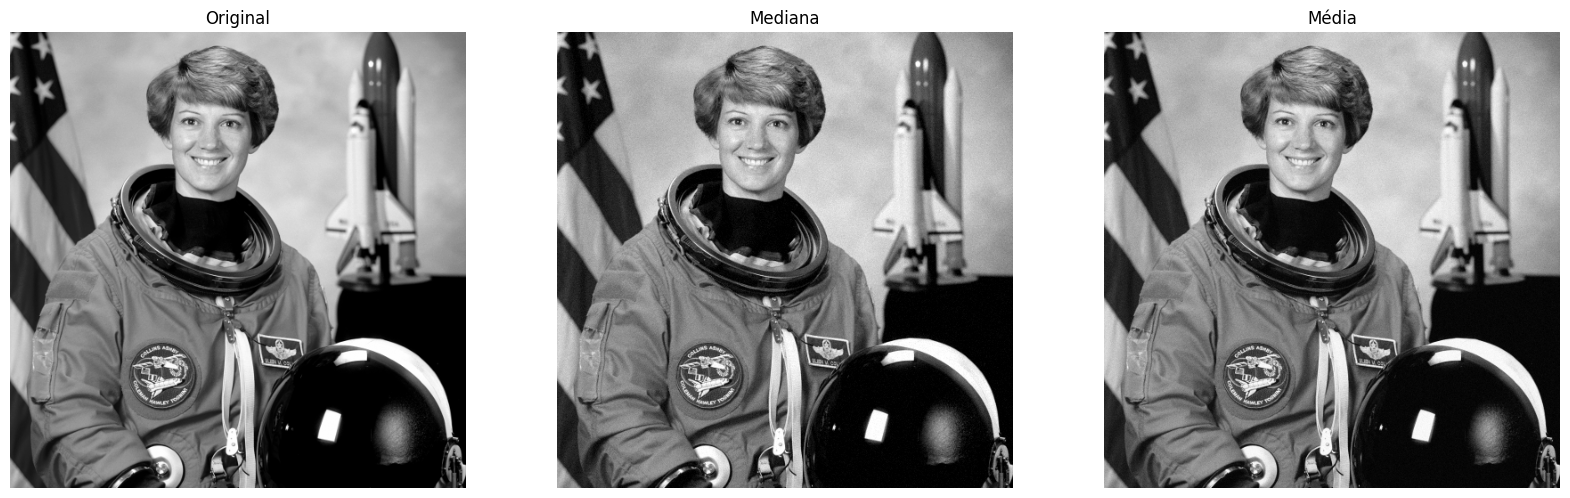

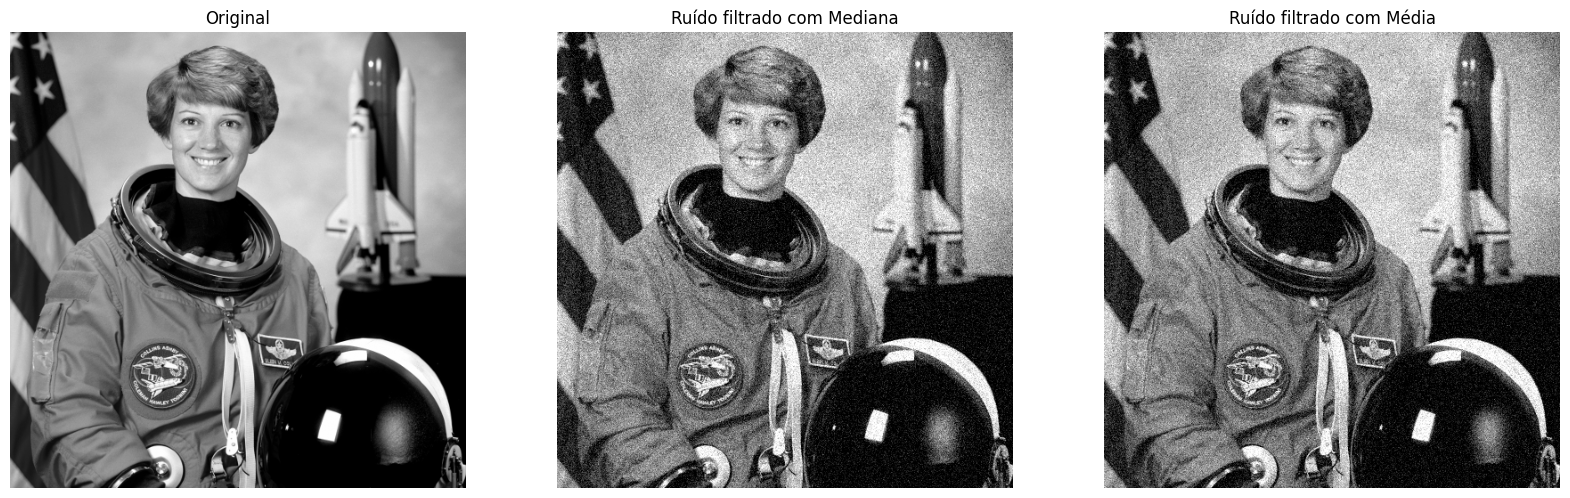

In [36]:
img = data.astronaut()
gimg = color.rgb2gray(img)
nimgMedian, figsMedian = NoiseSumMedian(gimg, 50)
nimgMean, figsMean = NoiseSumMean(gimg, 50)
print(psnr(gimg, nimgMedian))
print(psnr(gimg, nimgMean))
# show([gimg, nimgMedian[0], nimgMean[0]], ['Original', 'Mediana', 'Média'])
# show([gimg, figsMedian[0], figsMean[0]], ['Original', 'Ruído filtrado com Mediana', 'Ruído filtrado com Média'])

show([gimg,nimgMedian,nimgMean],['Original','Mediana', 'Média'])
# show([gimg,figsMedian[:,:,0],figsMean[0]],['Original','Ruido filtrado com Mediana', 'Ruido filtrado com Média'])
show([gimg, figsMedian[0], figsMean[0]], ['Original', 'Ruído filtrado com Mediana', 'Ruído filtrado com Média'])


# Questão 2
<p align="justify">Mudar a cor do fundo (*background*) da imagem apresentada a continuação, ela deve estar em tons de azul claro e o corpo do fósforo em tons de amarelo. Além disso, é fornecido a imagem binária, onde os fósforos estão representados pela cor branca e o fundo pela cor preta. Use operações aritméticas para executar o processo de modificação do fundo. A continuação são mostradas a imagem em escala de cinza e a respectiva máscara.</p>


<table><tr>
<td>
<figure><img src="https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo" alt="Drawing" width="300" class="center"/>
<figcaption>Imagem em escala de cinza</figcaption>
</figure>
</td>
<td>
<figure>
<img src="https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe" alt="Drawing" width="300" class="center"/>
<figcaption>Máscara</figcaption>
</figure>
</td>
</tr>
</table>


<p align="justify">DICA: para conseguir modificar a intensidade do fundo, incremente um valor $inc$ nos canais vermelho e verde, e incremente um valor $2*inc$ no canal azul.  </p>


<p align="justify">A Figura a continuação mostra o resultado final. A imagem gerada deve ser colorida e o tecido (fundo da imagem) deve aparecer na cor azul claro e os fósforos na cor amarela. </p>

<center>
<figure>
<img src="https://drive.google.com/uc?id=1BILk7RPeAuurU7dGTi-tJLxvwfkxCFv5" alt="Drawing" width="300" class="center"/>
<figcaption>Imágem resultante</figcaption>
</figure>
</center>

In [37]:

def change_background(img, mask):
  # Convert the image to a float array for easier manipulation
  nimg = img.copy()
  # Create a blue background
  nimg = np.dstack((nimg, nimg, nimg))
  inc = 65
  n = len(nimg)
  for i in range(n):
    for j in range(n):
      if mask[i,j] == 0:
        nimg[i,j,0] += inc
        nimg[i,j,1] += inc
        nimg[i,j,2] += 2 * inc
      elif(mask[i,j] == 255):
        if(img[i,j] >= 100):
          nimg[i,j,0] += 0
          nimg[i,j,1] += 0
          nimg[i,j,2] -= inc

  return nimg

(600, 600, 3)


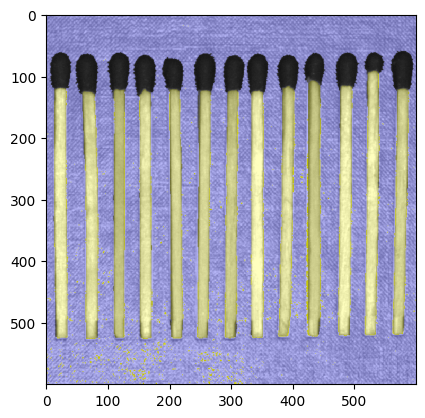

In [38]:
img = io.imread('https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo')
mask = io.imread('https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe')
nimg = change_background(img, mask)
print(nimg.shape)
plt.imshow(nimg)

# Questão 3
<p align="justify">
Implementar o método de realce de imagens, onde $$f_{highpass}(x,y) = (1+G).f(x,y)-G.f_{mean}(x,y)$$
onde $0 \leq G \leq 2$ e $f_{mean}$ é uma imagem suavizada.
</p>

In [39]:

def enhance(img, G=2, sigma=1):
  img = img_as_float(img)
  img = (1+G)*img - (G*filters.gaussian(img, sigma))
  return img


In [40]:
img = color.rgb2gray(data.chelsea())

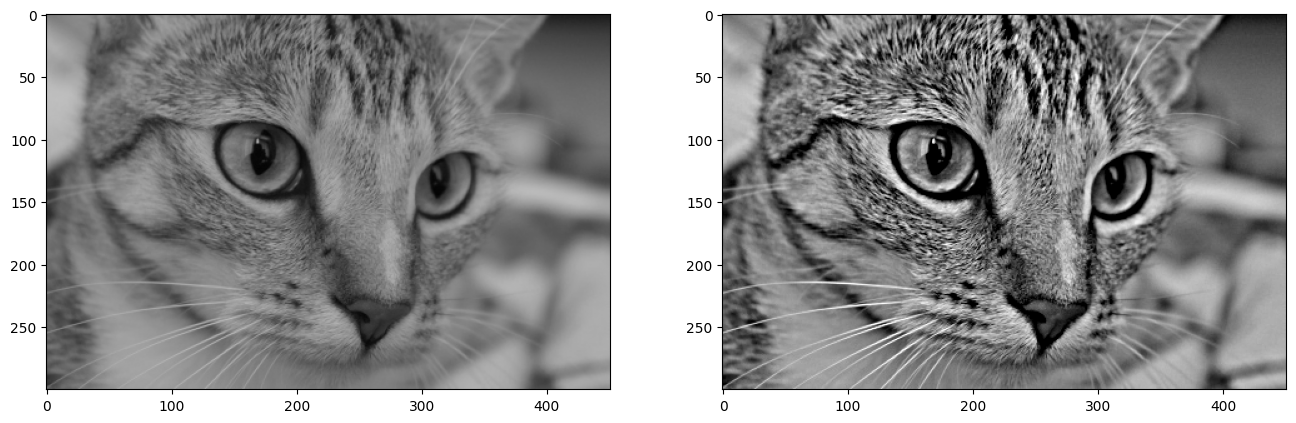

In [41]:
nimg = enhance(img, G=2, sigma=5)
f,ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(nimg, cmap='gray', vmin=0, vmax=1)

## Questao 4
<p> Uma outra forma de realçar as bordas de uma imagem é através do Laplaciano. A continuação é definido o $\textit{unsharp masking}$ baseado no Laplaciano

$$f(x,y) + \alpha(\bigtriangledown^2f(x,y))$$
onde $\bigtriangledown^2f(x,y)$ é o Laplaciano da imagem $f(x,y)$ e $\alpha$ é um fator de escala. Implementar a função $\textit{unsharp masking}$
</p>

In [42]:
def highboost(img, alpha=-3):
  alpha = 3
  img_laplacian = filters.laplace(img)  # Calcula o Laplaciano da imagem
  sharpened_img = img + (alpha * img_laplacian)  # Aplica o unsharp masking

  sharpened_img = np.clip(sharpened_img, 0, 1)  # Para imagens em ponto flutuante

  return sharpened_img


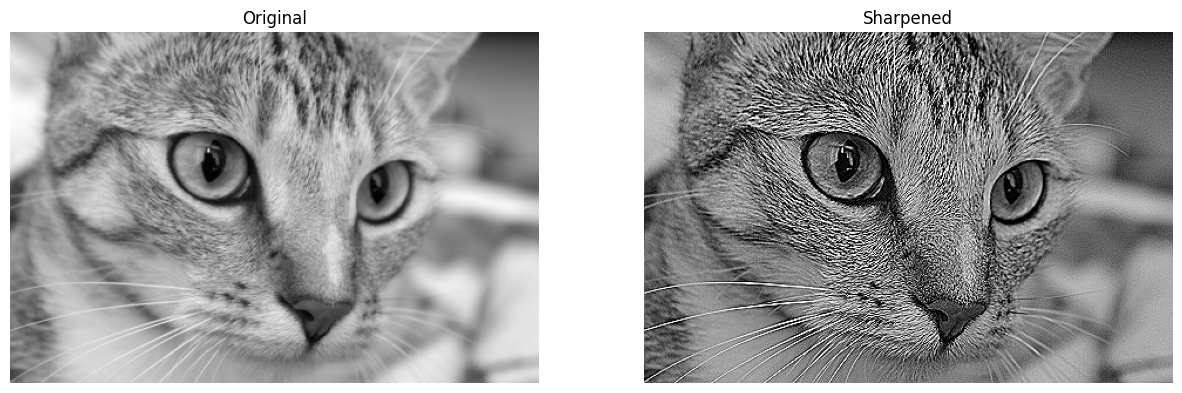

In [43]:
img = color.rgb2gray(data.chelsea())
nimg2 = highboost(img)
# nimg2 = ndimage.convolve(img, kernel)
show([img,nimg2 ],['Original', 'Sharpened'])

## Questão 5

<p>Crie a função que realça as bordas em imagens coloridas. A função deve receber como parâmetros a função de realce e os argumentos das função.</p>

In [44]:

def enhance_color_image(img, enhancement_function, **kwargs):
    # Converte a imagem para o formato de ponto flutuante
    img = img_as_float(img)

    # Cria uma nova imagem com as mesmas dimensões da imagem de entrada
    enhanced_img = np.zeros_like(img)

    # Aplica a função de realce a cada canal de cor separadamente
    for channel in range(3):
        enhanced_img[:, :, channel] = enhancement_function(img[:, :, channel], **kwargs)

    # Retorna a imagem colorida realçada
    return enhanced_img


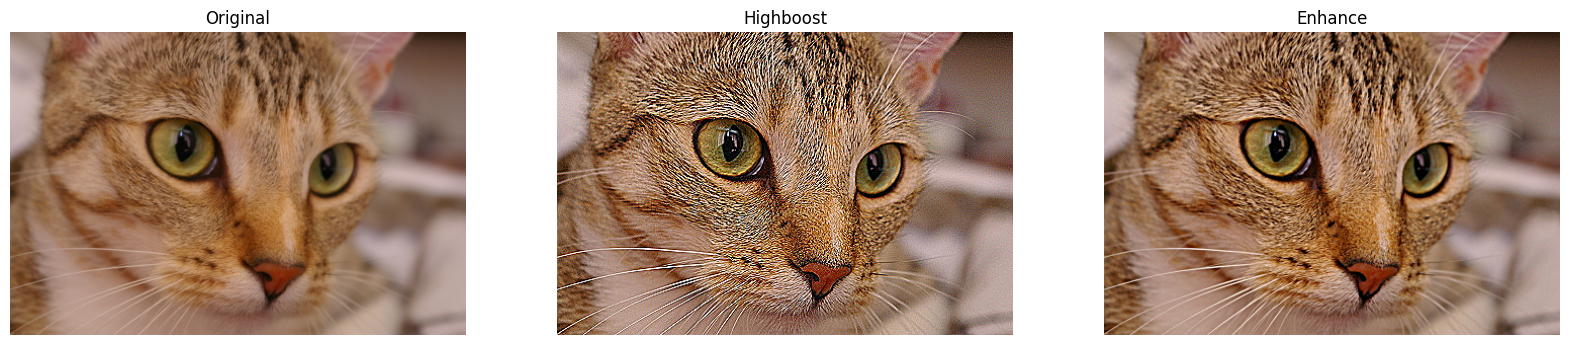

In [45]:
img = data.chelsea()
enhanced_color_HB = enhance_color_image(img, highboost, alpha=-3)
enhanced_color_EH = enhance_color_image(img, enhance, G=2, sigma=2)
show([img, enhanced_color_HB, enhanced_color_EH ],['Original','Highboost','Enhance'])

# Questão 6

<p>Implemente uma função que realize a rotação de uma imagem facial juntamente com seus respectivos landmarks. A imagem está associada a um conjunto de coordenadas que representam pontos-chave das principais partes da face. A rotação deve ser aplicada de forma consistente tanto à imagem quanto aos landmarks, preservando sua correspondência espacial.</p>

### Função para plotar os landmarks na imagem

In [46]:
def insertLandmark_in_2D_image(img, landmarks, value = 255, viz = 1):
    lin, col = img.shape[:2]
    for i in range( len(landmarks) ):
        iniR = landmarks[i,0] - viz
        endR = landmarks[i,0] + viz
        iniC = landmarks[i,1] - viz
        endC = landmarks[i,1] + viz
        if iniR >= 0 and endR < lin and iniC >= 0 and endC < col:
            img[ iniR:endR, iniC:endC ] = value
    return img

def insertLandmark_in_3D_image(img, landmarks, channel = 0, viz = 1):
    nimg = img.copy()
    value = 1 if np.max(img) <= 1 else 255
    lin, col = nimg.shape[:2]

    if channel == 0:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, value, viz)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, 0, viz)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, 0, viz)
    elif channel == 1:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, 0, viz)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, value, viz)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, 0, viz)
    elif channel == 2:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, 0, viz)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, 0, viz)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, value, viz)
    return nimg

### Carrega a imagem e seus respectivos landmarks

In [47]:
img = io.imread('https://drive.google.com/uc?id=15iM3Ds3oDwZ7w4iRggx5tbEM_HVayobR')

file_id = "1YFj703yFOwIIH5jnRU1Ix7FNu2NxKHc_" # replace with your ID
!gdown https://drive.google.com/uc?id={file_id}
landmarks = np.loadtxt('indoor_006.txt', delimiter=';').astype(np.float64)


Downloading...
From: https://drive.google.com/uc?id=1YFj703yFOwIIH5jnRU1Ix7FNu2NxKHc_
To: /content/indoor_006.txt
100% 1.15k/1.15k [00:00<00:00, 4.01MB/s]


### Plotando a imagem junto com os landmarks

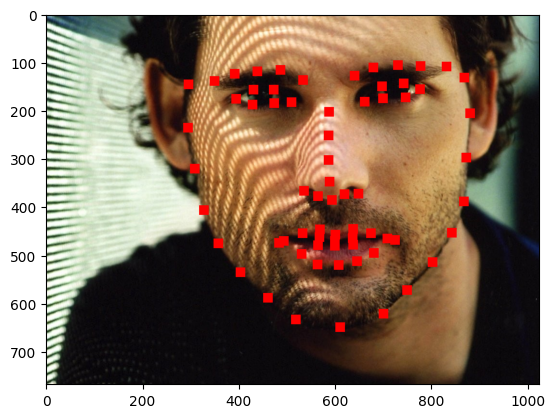

In [48]:
plt.imshow(insertLandmark_in_3D_image(img, landmarks[:,-1::-1].astype(np.int64), channel = 0, viz = 10))

In [49]:
def rotation_matrix(theta, rows, cols):
    center = (cols / 2, rows / 2)
    return cv2.getRotationMatrix2D(center, theta, 1.0)

In [50]:
def rotacao(img, landmarks, angulo):
    rows, cols = img.shape[:2]
    rot_mat = rotation_matrix(angulo, rows, cols)

    # Rotacionar a imagem
    nimage = cv2.warpAffine(img, rot_mat, (cols, rows))

    # Adicionar coordenadas homogêneas aos landmarks
    ones = np.ones((landmarks.shape[0], 1))  # Adicionar uma coluna de 1s
    landmarks_homog = np.hstack((landmarks, ones))  # Converter para (N, 3)

    # Aplicar a matriz de rotação aos landmarks
    n_landmarks = np.dot(landmarks_homog, rot_mat.T)  # Matriz transposta para alinhamento correto

    return nimage, n_landmarks


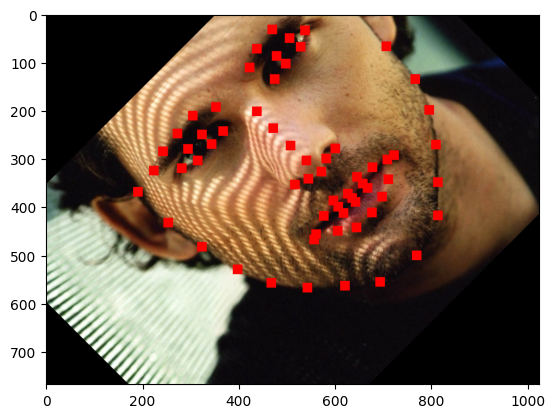

In [51]:
nimg, nlandmark = rotacao(img, landmarks, 45)
nlandmarkinvertido = nlandmark[:, ::-1]
plt.imshow(insertLandmark_in_3D_image(nimg, nlandmarkinvertido.astype(np.int64), channel = 0, viz = 10))